# Effects of different features on Loan Status in Prosper Loan Data

#### by Shazia Zahid


## Investigation Overview

In this investigation, I want to look at the characteristics of Loans which are completed and loans which are defaulted. This investigation might help us in making an informed decesion about weather a specific loan will be defalted or paid back within its due time.

## Dataset Overview
The original data can be found here: 

https://s3.amazonaws.com/udacity-hosted-downloads/ud651/prosperLoanData.csv

The complete dataset contains 113,937 loans (observations or rows) with 81 features (variables or columns).

Each variable is giving important information about dataset. I found that more than three variable are being used to uniquely identifying observations and loans. I am not converting the string variables into categories because they do not have fixed sets of values and for Loan outcome status, I need to re-classify it with Completed/Defaulted only.



In [142]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# Initials of Samuel Norman Seaborn so using sns here insted of sb
import seaborn as sns

%matplotlib inline

In [143]:
# Reading given csv file into pandas dataframe.
df_complete = pd.read_csv('prosperLoanData.csv')

In [144]:
# Code-1
df_complete = df_complete.drop_duplicates(subset='ListingKey')

In [145]:
# I am interested only these columns, making a list

cols = ['ListingKey','LoanStatus','Term','BorrowerAPR','BorrowerRate','EmploymentStatus','StatedMonthlyIncome','LoanOriginalAmount']

# making a new dataframe with columns I want to explore.
df = df_complete[cols]

In [146]:
# Code-2
# Removing rows with missing borrower APR information

df = df[~df.BorrowerAPR.isna()]

In [147]:
# Code-3
# Filling nan with Unknown in EmploymentStatus column

df['EmploymentStatus'] = df['EmploymentStatus'].fillna("Unknown")

In [148]:
# Code-5

df.drop('ListingKey', axis=1, inplace=True)

#### Bar Chart for Loan Status

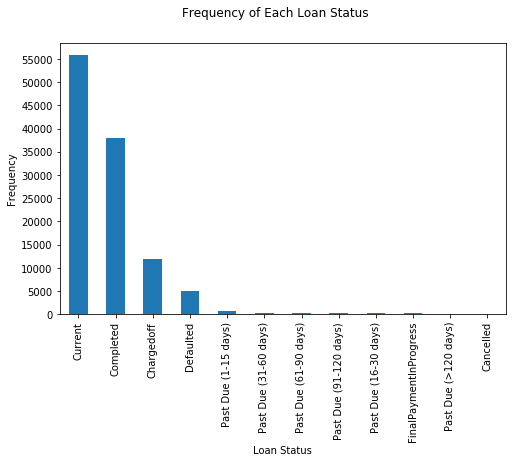

In [149]:
# Ploting Loan Status to see frequency of each Status in dataframe
data = df.LoanStatus.value_counts()
fig = plt.figure(figsize=(8,5)) # Creates a new figure
fig.suptitle('Frequency of Each Loan Status', fontsize=12)
plt.xlabel("Loan Status")
plt.ylabel("Frequency")
plt.yticks(np.arange(min(data)-5, max(data)+1, 5000))
data.plot(kind = 'bar');

We have many statuses of Loans here. It is tough to decide that what distinguishes completed loans from defaulted loans. Because there is no way to tell whether "current" loans will eventually default or completed, we cannot use them for our analysis. Nearly half of the dataset is not useful to us, as the loans are still outstanding. 

Since we want to have an insight based on historical data and want to retain maximum possible amount of data, let's assume all the"Cancelled", "Past due" and "chargedoff" loans are defaulted and FinalPaymentInProgress are completed.

Thus we'll be left with three categories only: "Current" ,"Completed" and "Defaulted". 


In [150]:
# in first step adding a new column 'LoanStatusCat'
# then using lambda function with if/else to populate it with three categories

#df['new column name'] = df['column name'].apply(lambda x: 'value if condition is met' if x condition else 'value if condition is not met')

df['LoanStatusCat'] = df['LoanStatus'].apply(lambda x: x if (x == 'Current' or x =='Completed') else ('Completed' if x== 'FinalPaymentInProgress' else 'Defaulted'))

In [151]:
# Deleting LoanStatus column as it wont be used anymore
df.drop('LoanStatus', axis=1, inplace=True)

In [152]:
# Removing rows (observations) with current loans from dataframe
df_clean = df.query('LoanStatusCat != "Current"')

In [153]:
# What is the ratio of Defaulted loans?

df_clean.LoanStatusCat.value_counts()/df_clean.LoanStatusCat.count()

Completed    0.667219
Defaulted    0.332781
Name: LoanStatusCat, dtype: float64

#### Propotions of Loan Status

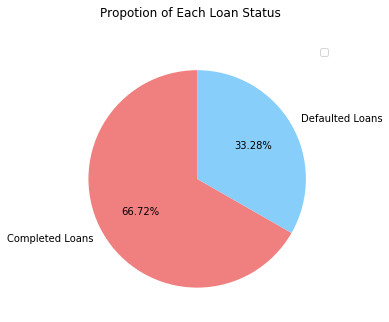

In [154]:
# Making pie chart on complete and defaulted loans.
labels = ['Completed Loans', 'Defaulted Loans']
sizes = df_clean.LoanStatusCat.value_counts()
colors = ['lightcoral', 'lightskyblue']
fig = plt.figure(figsize=(8,5)) # Creates a new figure
fig.suptitle('Propotion of Each Loan Status', fontsize=12)
plt.legend(labels)
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.2f%%', startangle=90);

After making only three categories we are working only on defaulted and completed loans. In the pie chart, we can see huge slice of defaulters here.1/3 of loans are defaulted in historical data. May be Prosper can inplace a system to minimize defaulters. It can be another recovery system or some relatioship between characteristcs of Defaulters. 

Since slice of Defaulted Loans is quite large we must explore other features that might help in predicting if a Loan would be defaulted in future.

In [155]:
# Exploring the Term variable in clean dataframe

term_data = df_clean.Term.value_counts()

#### Bar Chart  for Term

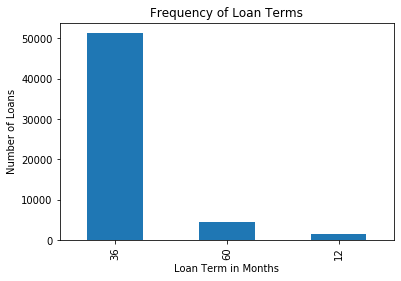

In [156]:
# Plotting discrete variable Term.
term_data.plot(kind = 'bar', figsize = (6,4))
plt.xlabel('Loan Term in Months', fontsize=10)
plt.ylabel('Number of Loans', fontsize=10)
plt.title('Frequency of Loan Terms');

While exploring characteristics of peers who have borrowed from Propsper, it was found that most of the loans were for Three years i.e 36 months. One year (12 months) loans are least popular.

#### Bar Chart for Employment Status

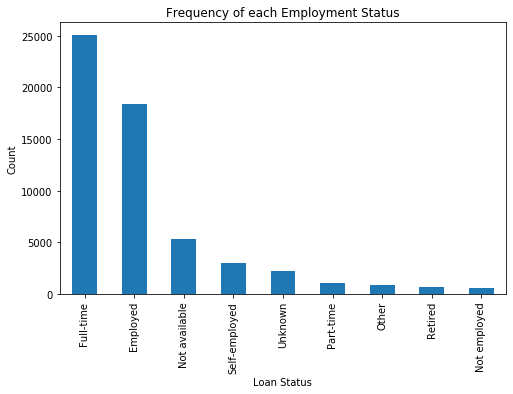

In [157]:
# My third categorical variable is EmploymentStatus

fig = plt.figure(figsize=(8,5)) # Creates a new figure
data1 = (df_clean.EmploymentStatus).value_counts()
plt.title('Frequency of each Employment Status', fontsize=12)
plt.xlabel("Loan Status")
plt.ylabel("Count")
plt.yticks(np.arange(0, max(data1)+1, 5000))


data1.plot(kind = 'bar');

In [158]:
# What is the percenage of borrowers who declared them as Not employed:
df_clean.query('EmploymentStatus == "Not employed"').EmploymentStatus.count()/df_clean.EmploymentStatus.count()*100

1.0242361850255624

Most of the borrowers are working full time. Only 1 percent borrowers declared themselves as not employed.

#### Distribtion of Borrower's Annual Percentage Rate

Since it is a continous variable, I will make a histogram  for this variable, on cleaned dataframe.

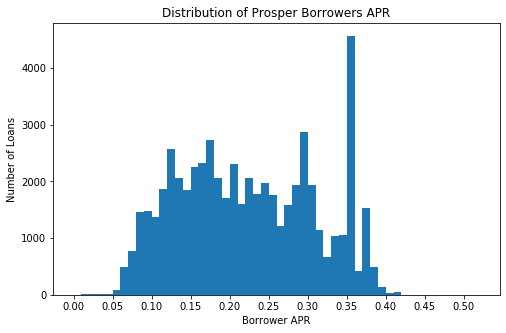

In [159]:
# Plotting hostogram for BorrowerAPR

bins = np.arange(0, df_clean.BorrowerAPR.max()+0.01, 0.01)
plt.figure(figsize=[8, 5])
plt.title('Distribution of Prosper Borrowers APR', fontsize=12)

plt.xlabel('Borrower APR')
plt.ylabel('Number of Loans')
plt.xticks(np.arange(0, max(df_clean.BorrowerAPR), 0.05))

plt.hist(data = df_clean, x = 'BorrowerAPR', bins = bins);

The distribution of APR is very interesting. It does not looks normal or even unimodal. One thing is quite evident that 0.36 is the most frequent APR in whole dataframe.

A small peak centered at 0.1, a large peak centered at 0.2. There is also a fairly large peak centered 0.3. Additionally,  The sharpest peak is at 0.36. Only very few loans have APR greater than 0.43.

#### Distribtion of Borrower Rate

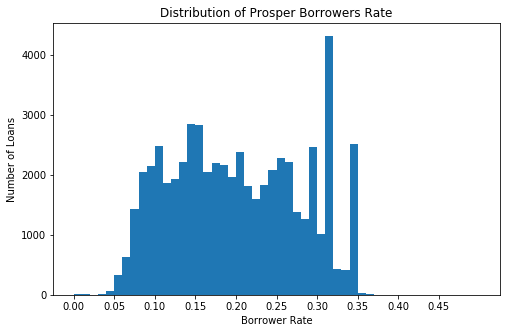

In [160]:
# Checking the distribution of BorrowerRate 
# Plotting

bins = np.arange(0, df_clean.BorrowerRate.max()+0.01, 0.01)
plt.figure(figsize=[8, 5])
plt.title('Distribution of Prosper Borrowers Rate', fontsize=12)
plt.hist(data = df_clean, x = 'BorrowerRate', bins = bins);
plt.xlabel('Borrower Rate')
plt.ylabel('Number of Loans')
plt.xticks(np.arange(0, max(df_clean.BorrowerRate), 0.05));

The distribution of Rate is multimodal as expected from distribution of APR. Sharpest peak can be seen at 0.32 this time.

A small peak centered at 0.1, a large peak centered at 0.15. There is also a fairly large peak centered 0.31 Additionally, there are two very sharp peaks between 0.30 and 0.35.
 
Average Borrowere Rate is 20% but there are peers who are paying only 13% and 49% interest rate as well.That is a big spread with standard deviation of 0.08.

#### Distribtion of Original Amount of Loan

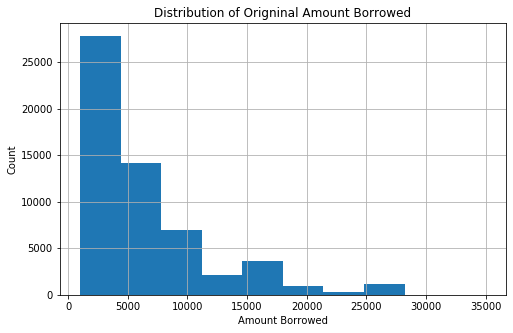

In [161]:
# Exploring LoanOriginalAmount

fig = plt.figure(figsize=(8,5)) # Creates a new figure
data2 = df_clean.LoanOriginalAmount

plt.title('Distribution of Origninal Amount Borrowed', fontsize=12)
plt.xlabel("Amount Borrowed")
plt.ylabel("Count")
plt.yticks(np.arange(0, max(data2)+1, 5000))
data2.hist();

Distribution of Original Amount of Loan is right skewed. Most of the peers borrowed less than ten thousands  but some peers borrowed much larger amounts and made the distributon right skewed. Average amount borrowed stands at $6341.

#### Distribtion of Stated Monthly Income

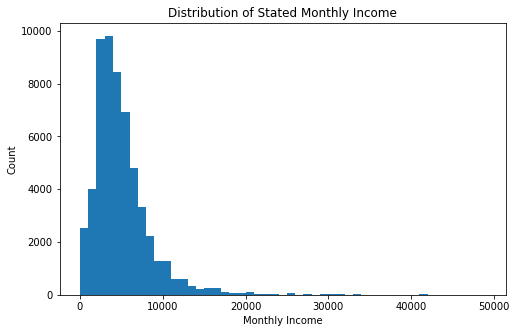

In [162]:
# Now exploring StatedMonthlyIncome
#Distribution of stated monthly income

bins = np.arange(0, 50000, 1000)

fig = plt.figure(figsize=(8,5)) # Creates a new figure
data2 = df_clean.LoanOriginalAmount

plt.title('Distribution of Stated Monthly Income', fontsize=12)
plt.xlabel("Monthly Income")
plt.ylabel("Count")
plt.yticks(np.arange(0, max(df_clean.StatedMonthlyIncome), 2000))

plt.hist(data = df_clean, x = 'StatedMonthlyIncome', bins=bins);

StatedMonthlyIncome is highly right skewed. May be there are outliers. Some peers with very high monthly incomes are borrowing.

It is clear that there are outliers. We can try to do something with outliers in later cells.

Outlier: A data point that is distinctly separate from the rest of the data. One definition of outlier is any data point more than 1.5 interquartile ranges (IQRs) below the first quartile or above the third quartile. Outliers can bee seen in box plots as well.

Lets plot it on log scale and then check summery statistics for find out what could be done.

#### Distribtion of Stated Monthly Income

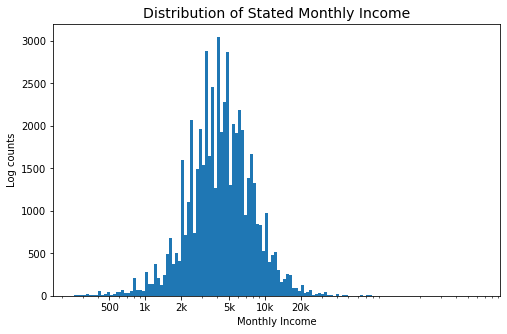

In [163]:
# there's a long tail in the distribution, so let's put it on a log scale instead
log_binsize = 0.025
bins = 10 ** np.arange(2.4, np.log10(df_clean['StatedMonthlyIncome'].max())+log_binsize, log_binsize)

plt.figure(figsize=[8, 5])
plt.title('Distribution of Stated Monthly Income', fontsize=14)
plt.hist(data = df_clean, x = 'StatedMonthlyIncome', bins = bins)
plt.xscale('log')
plt.xticks([500, 1e3, 2e3, 5e3, 1e4, 2e4], [500, '1k', '2k', '5k', '10k', '20k'])
plt.xlabel('Monthly Income')
plt.ylabel('Log counts')
plt.show()

Whenplotted on log scale distribution turns out to be multimodel with very sharp peeks. Most of the stated monthly incomes are within 1t housand to 20 thousand dollars.

In [164]:
# Getting percentage of peers who stated monthly income greater than 30000
((df_clean.StatedMonthlyIncome > 30000).sum())/(df_clean.shape[0])* 100

0.26347472561986357

In [165]:
# Keeping rows with stated monthly income less than 30000 considering tothers outliers
df_clean = df_clean[df_clean.StatedMonthlyIncome <= 30000]

#### Term vs Loan Status(Completed,Defaulted)

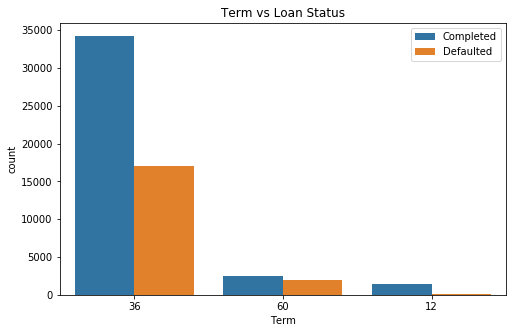

In [166]:
# Making a Stacked plot to see Term vs LoanStatusCat both are categorical variables
cat1_order = df_clean.Term.unique()
cat2_order = df_clean.LoanStatusCat.unique()
plt.figure(figsize = (8,5))
plt.title('Term vs Loan Status',fontsize=12)
plt.xlabel('Terms')
plt.ylabel('Counts')
sns.countplot(data = df_clean, x = 'Term', hue = 'LoanStatusCat', order = cat1_order, hue_order = cat2_order)
plt.legend();

It looks like the longer Peers borrow the more they turn to be defaulters. It can be seen clearly that Loans borrowed for 60 months were defaulted more that half percent of time. Loans taken for 12 months have the highest ratio of pay back. May be Prosper can emphasize more on 12 months loans or make changes in 60 month loan conditions for better recovery.

#### Distribution of Loan Amount with respect to Loan Status(Completed,Defaulted)

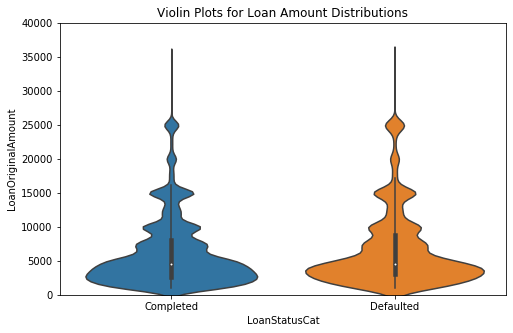

In [167]:
# Making a violin plot to see distribution of two variables Loan Status and Amount of Loan
# Loan Status is Qualitative and Amount is Quantitave

fig = plt.figure(figsize = (8,5))
plt.title('Violin Plots for Loan Amount Distributions',fontsize=12)

#ax1 = fig.add_subplot(221)
sns.violinplot(data=df_clean, x="LoanStatusCat", y="LoanOriginalAmount").set_ylim([0,40000]);

I am unable to see any major differece here. It looks like Orignal amount of loan does not have an impact on loan status.Since there is no major variation in distributions for Completed and Defaulted Loans, Prosper does not need to work on Loans Original Amount. 

####  Employment Status vs Loan Status(Completed,Defaulted)

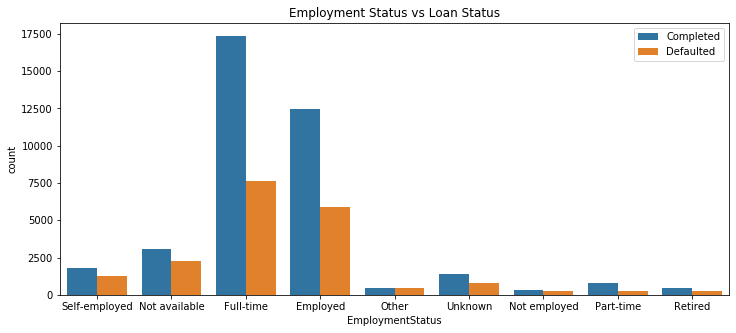

In [168]:
# Making a Stacked plot to see Term vs LoanStatusCat both are categorical variables
cat1_order = df_clean.EmploymentStatus.unique()
cat2_order = df_clean.LoanStatusCat.unique()
plt.figure(figsize = (12,5))
plt.title('Employment Status vs Loan Status',fontsize=12)
plt.xlabel('Employment Status')
plt.ylabel('Counts')
sns.countplot(data = df_clean, x = 'EmploymentStatus', hue = 'LoanStatusCat', order = cat1_order, hue_order = cat2_order)
plt.legend();

Peers working full time were not at the best in paying back their loan as opposed to common belief.

Self-employed, Other and not-available have the highest ratio of defaulters. While unexpectedly part-time workers completed their loans even better than full time and Employed categories.

####  Employment Status vs Term

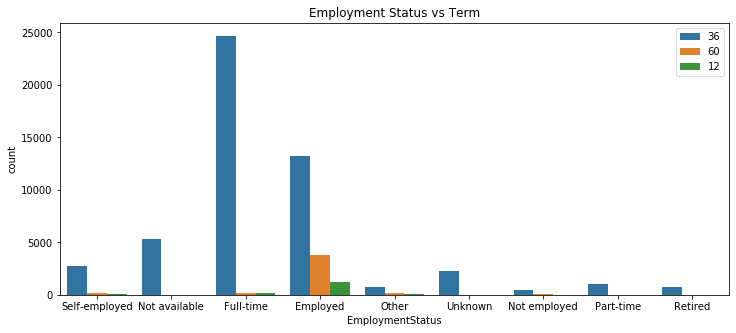

In [169]:
# Making a Stacked plot to see Term vs LoanStatusCat both are categorical variables
cat1_order = df_clean.EmploymentStatus.unique()
cat2_order = df_clean.Term.unique()
plt.figure(figsize = (12,5))
plt.title('Employment Status vs Term', fontsize=12)
plt.xlabel('Employment Status')
plt.ylabel('Counts')
sns.countplot(data = df_clean, x = 'EmploymentStatus', hue = 'Term', order = cat1_order, hue_order = cat2_order)
plt.legend();

36 months Loans are most popular among all employment statuses. Employed is the only category with sisgnificant number of peers who borrowed for 60 months and 12 months as well.

#### Correlation between Loan Amount, BorrowerAPR , MonthlyIncome , BorrowerRate

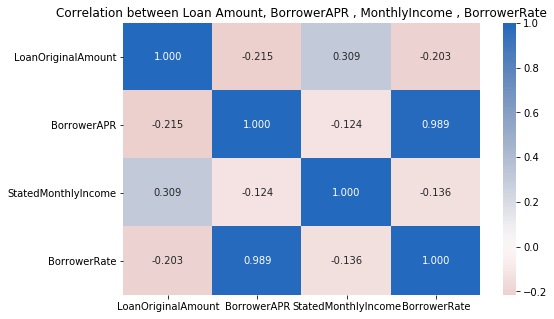

In [170]:
# ploting correlation of above list with heatmap
# https://kite.com/python/docs/matplotlib.pyplot.colormaps

# Making a list of columns to use in heatmap
data_heatmap = ['LoanOriginalAmount', 'BorrowerAPR', 'StatedMonthlyIncome','BorrowerRate']

plt.figure(figsize = [8, 5])
plt.title('Correlation between Loan Amount, BorrowerAPR , MonthlyIncome , BorrowerRate',fontsize=12)

sns.heatmap(df_clean[data_heatmap].corr(), annot = True, fmt = '.3f',cmap = 'vlag_r', center = 0);

 #### Plot Matrix for Numeric features

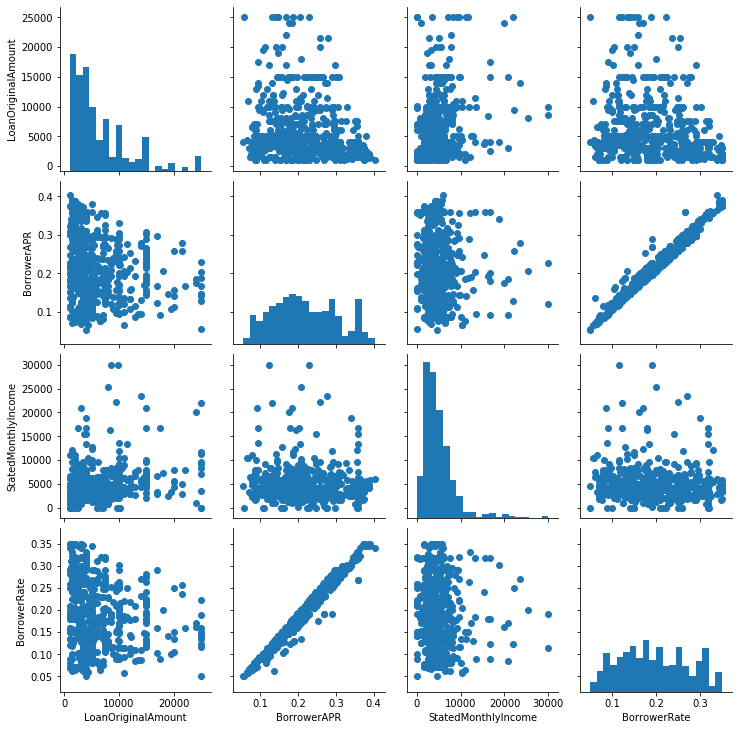

In [171]:
# plot matrix: sample 500 diamonds so that plots are clearer and render faster

# data_heatmap is my list of numeric features(columns) made in heatplot

df_clean_samp = df_clean.sample(500)

g = sns.PairGrid(data = df_clean_samp, vars = data_heatmap)
g = g.map_diag(plt.hist, bins = 20);
g.map_offdiag(plt.scatter);

Loan Amount and BorrowerAPR has a weak negative correlation. It makes sense that when one increases other decreases.

I can see that BorrowerRate and BorrowerAPR have a very strong positive correlation.

Monthly Income and Loan Amount have a weak positive correlation. Peers with higher incomes borrow larger amounts is a big statement but there is a tendency we can say.

Monthly Income and BorrowerRate have a very weak negative correlation. Almost negligable.

#### Is LoanStatus affected by Amount of Loan and Stated Monthly Income

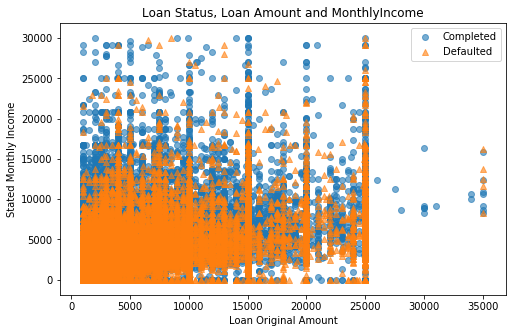

In [172]:
# Multivariate
# LoanStatus is category variable. with Amount on x-axis and StatedMonthlyIncome on y-axis
# https://matplotlib.org/api/markers_api.html
plt.figure(figsize = [8, 5])
plt.title("Loan Status, Loan Amount and MonthlyIncome",fontsize=12)
plt.xlabel('Loan Original Amount')
plt.ylabel('Stated Monthly Income')

cat_markers = [['Completed', 'o'],
               ['Defaulted', '^']]

for cat, marker in cat_markers:
    df_cat = df_clean[df_clean['LoanStatusCat'] == cat]
    plt.scatter(data = df_cat, x = 'LoanOriginalAmount', y = 'StatedMonthlyIncome', marker = marker, alpha=0.6)

plt.legend(['Completed','Defaulted']);

Looks like peers who borrowed more than 25000 and less than 35000 paidback most of the time and monthly income is a better indicator/preditor of being a defaulter or paying back the loan. Peers with higher monthly incomes have a higher rate of paying back the loans.

#### Is LoanStatus affected by BorrowerAPR and BorrowerAPR

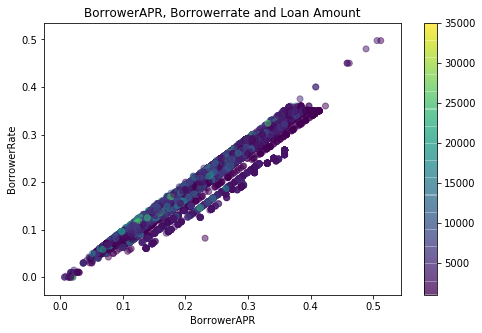

In [173]:
# Scatter plot for three numeric variables
plt.figure(figsize = [8, 5])
plt.title("BorrowerAPR, Borrowerrate and Loan Amount",fontsize=12)
plt.xlabel('BorrowerAPR')
plt.ylabel('BorrowerRate')

plt.scatter(data = df_clean, x = 'BorrowerAPR', y = 'BorrowerRate', c = 'LoanOriginalAmount', alpha=0.5)
plt.colorbar();

I already found a strong positive correlation between borrowerAPR and borrower Rate  and now I extended my research to see the impact of the Amount borrowed. The multivariate exploration showed that the relationship between borrower APR and loan amount is positive and higher amonuts of loan almost invisible. 

#### Effect of LoanStatus on relationship of Amount and BorrowerRate

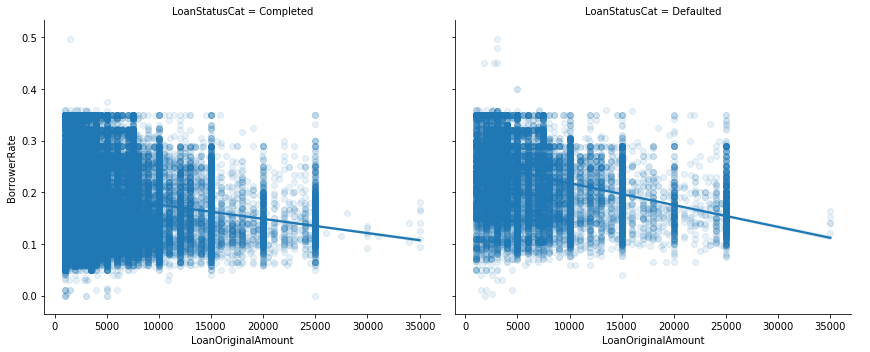

In [174]:
# Effect of LoanStatus with Amount on x-axis and BorrowerRate on y-axis
# Jitter adds some random noise to the data. This parameter will adjust the positions along the categorical axis.
g=sns.FacetGrid(data=df_clean, aspect=1.2, height=5, col='LoanStatusCat', col_wrap=2)
g.map(sns.regplot, 'LoanOriginalAmount', 'BorrowerRate', x_jitter=0.04, scatter_kws={'alpha':0.1});
g.add_legend();


Relationship of loan rate and loan amount is not affected weather the loan is paidback or defaulted.Both have a weak negative correlation among them.

#### Effect of Term on relationship of Amount and BorrowerRate

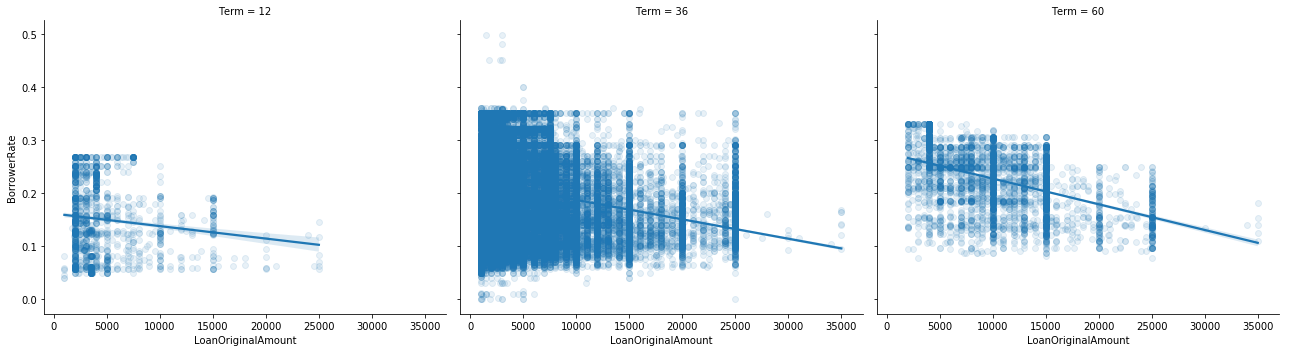

In [175]:
# Effect of Term with Amount on x-axis and BorrowerRate on y-axis
# Jitter adds some random noise to the data. This parameter will adjust the positions along the categorical axis.
g=sns.FacetGrid(data=df_clean, aspect=1.2, height=5, col='Term', col_wrap=3)
g.map(sns.regplot, 'LoanOriginalAmount', 'BorrowerRate', x_jitter=0.04, scatter_kws={'alpha':0.1});
g.add_legend();

It looks like Term doesn't have effect on relationship of Loan rate and LoanAmount

#### Effect of Employment Stattus on relationship of Amount and BorrowerRate

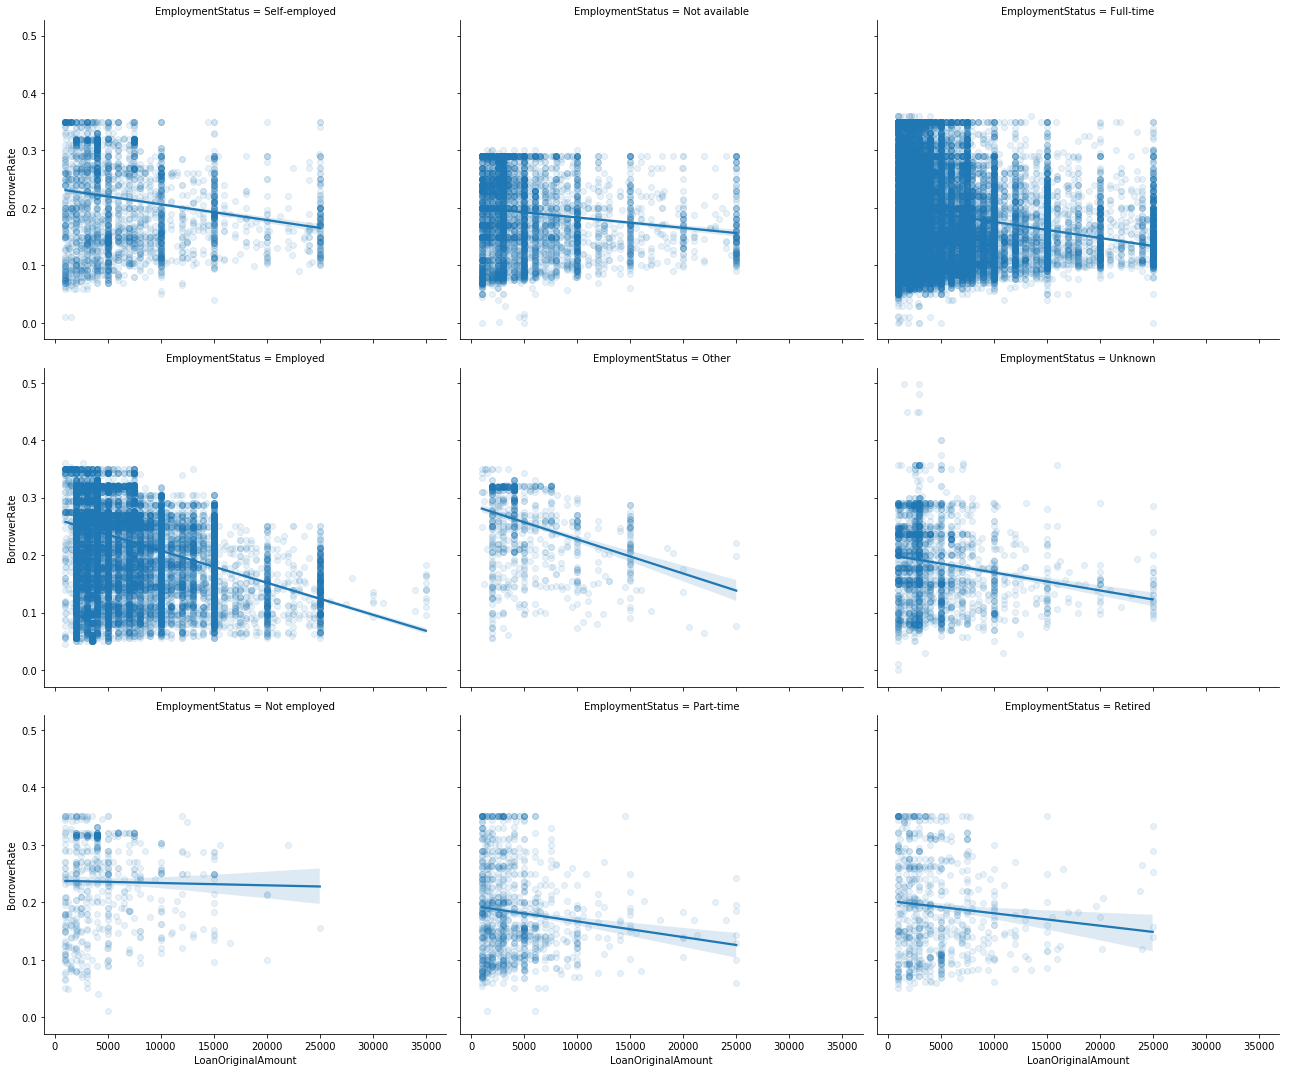

In [176]:
# Effect of EmploymentStatus with Amount on x-axis and BorrowerRate on y-axis
# Jitter adds some random noise to the data. This parameter will adjust the positions along the categorical axis.


g=sns.FacetGrid(data=df_clean, aspect=1.2, height=5, col='EmploymentStatus', col_wrap=3)
g.map(sns.regplot, 'LoanOriginalAmount', 'BorrowerRate', x_jitter=0.04, scatter_kws={'alpha':0.1});
g.add_legend();

Best fit line shows lot of fluctuation in effects with each employment status.When Employment status is not-employed and not available line is almost straight otherwise it shows negative correlation between Amount and Rate.

#### Rating and term effects on stated monthly income and loan original amount variables

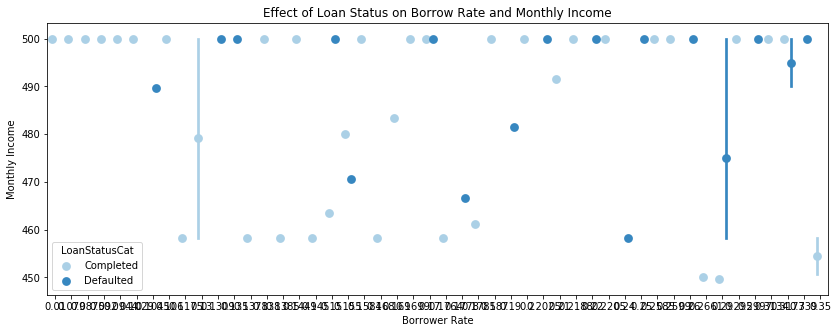

In [177]:
fig, ax = plt.subplots(ncols=1, figsize=[14,5])

# For Income between 450-500 dollars
df_new = df_clean.query('StatedMonthlyIncome > 449 &  StatedMonthlyIncome < 501 ')
plt.xticks(np.arange(0, max(df_clean.BorrowerRate), 1.0))
sns.pointplot(data = df_new, x = 'BorrowerRate', y = 'StatedMonthlyIncome', hue = 'LoanStatusCat', palette = 'Blues', linestyles = '', dodge = 0.4);
plt.title("Effect of Loan Status on Borrow Rate and Monthly Income",fontsize=12)
plt.xlabel('Borrower Rate')
plt.ylabel('Monthly Income');

There is no good explanation for this plot but looks like lower borrow rate and lower monthly income has a better chance of Completed loans.

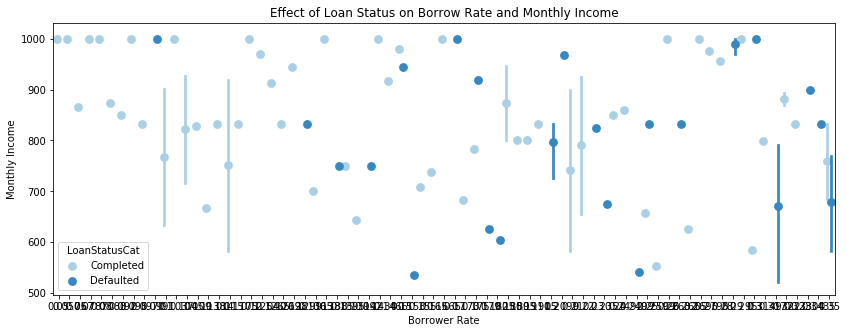

In [178]:
fig, ax = plt.subplots(ncols=1, figsize=[14,5])

# For Income between 450-500 dollars
df_new1 = df_clean.query('StatedMonthlyIncome > 500 &  StatedMonthlyIncome < 1001 ').sample(100)
plt.xticks(np.arange(0, max(df_clean.BorrowerRate), 1.0))
sns.pointplot(data = df_new1, x = 'BorrowerRate', y = 'StatedMonthlyIncome', hue = 'LoanStatusCat', palette = 'Blues', linestyles = '', dodge = 0.4);
plt.title("Effect of Loan Status on Borrow Rate and Monthly Income")
plt.xlabel('Borrower Rate')
plt.ylabel('Monthly Income');

With income in bracket of 500-1000, sample of 100 obseravtions, point plot does not give any clear information but it looks like peers with higher income and lower borrow Rate complete their loans. It didnt revealed any new information.

### Limitations
The Explanatory Data Analysis is a nice way to know the data using cear and interesting visualizations. However, to make final statement about the  relationships between characteristcs we need to perform statistical tests and  build predictive models.

####  Thank You

In [179]:
# Found these two commands on Udacity Knowledge but not working for me
#! jupyter nbconvert explanation.ipynb --to slides --post serve --template output_toggle
#!jupyter nbconvert explanation.ipynb --to slides --template output-toggle.tpl --post serve

# From stackoverflow without hiding input coding
#!jupyter nbconvert explanation.ipynb --to slides

# From stackoverflow hiding input coding
! jupyter nbconvert --to slides --TemplateExporter.exclude_input=True explanation.ipynb

[NbConvertApp] Converting notebook explanation.ipynb to slides
[NbConvertApp] Writing 1017751 bytes to explanation.slides.html
